In [1]:
import tensorflow as tf
from tensorflow import keras
import keras_vggface 
from keras_vggface import VGGFace
# from tensorflow.keras.applications.vggface import preprocess_input
import mtcnn
import numpy as np
import matplotlib as mpl
from keras.utils.data_utils import get_file
import keras_vggface . utils
import PIL
from PIL import Image
import os
from keras. layers import Flatten, Dense, Input
from keras_vggface.vggface import VGGFace
import os. path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
# from keras.engine.topology import network


In [2]:
train_dataset = keras.utils.image_dataset_from_directory('train2/',class_names=['bakul', 'maurya', 'unknown'],shuffle = True,batch_size = 8,image_size = (224,224))
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip('horizontal'),
    keras.layers.RandomRotation(0.2),
    ])

vggface_resnet_base = VGGFace(model='resnet50',include_top=False,input_shape=(224,224,3))


Found 270 files belonging to 3 classes.


In [3]:
nb_class = 3 # Number of new people + 1 for unknown/Inva lid
# Freeze the base model
vggface_resnet_base.trainable = False
last_layer = vggface_resnet_base.get_layer( 'avg_pool') .output
# Build up the new model
inputs = tf.keras.Input (shape= (224, 224, 3))
x = data_augmentation (inputs)
x = vggface_resnet_base(x)
x = Flatten(name= 'flatten')(x)
out =  Dense(nb_class, name='classifier')(x)

In [4]:
custom_vgg_model = keras.Model(inputs, out)
base_learning_rate = 0.0001
custom_vgg_model.compile (optimizer=tf. keras.optimizers .Adam(learning_rate=base_learning_rate),loss=keras.losses .SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [5]:
history = custom_vgg_model.fit(train_dataset,epochs = 20)

Epoch 1/20
34/34 [==============================] - 48s 1s/step - loss: 1.5967 - accuracy: 0.5407
Epoch 2/20
34/34 [==============================] - 41s 1s/step - loss: 0.7377 - accuracy: 0.7481
Epoch 3/20
34/34 [==============================] - 41s 1s/step - loss: 0.4217 - accuracy: 0.8667
Epoch 4/20
34/34 [==============================] - 40s 1s/step - loss: 0.3388 - accuracy: 0.8815
Epoch 5/20
34/34 [==============================] - 41s 1s/step - loss: 0.3181 - accuracy: 0.9074
Epoch 6/20
34/34 [==============================] - 41s 1s/step - loss: 0.2748 - accuracy: 0.9000
Epoch 7/20
34/34 [==============================] - 41s 1s/step - loss: 0.2403 - accuracy: 0.9259
Epoch 8/20
34/34 [==============================] - 40s 1s/step - loss: 0.2164 - accuracy: 0.9333
Epoch 9/20
34/34 [==============================] - 40s 1s/step - loss: 0.1736 - accuracy: 0.9630
Epoch 10/20
34/34 [==============================] - 40s 1s/step - loss: 0.1667 - accuracy: 0.9667
Epoch 11/20
34/34 [

(1280, 575, 3)


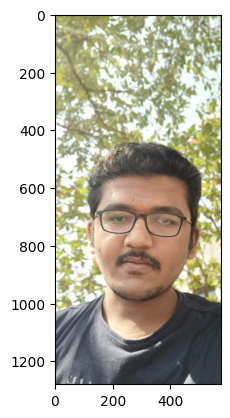

In [6]:
img = mpimg.imread('2.jpg')
print(img.shape)
imgplot = plt.imshow(img)
plt.show()

In [7]:
face_detector = mtcnn.MTCNN()
face_roi = face_detector.detect_faces(img)

1/1 [==============================] - 0s 297ms/step


In [8]:
x1, y1, width, height = face_roi[0]["box"]
x2, y2 = x1 + width, y1 + height
face = img[y1:y2, x1:x2]

resized_face = cv2.resize(face, (224, 224), interpolation=cv2.INTER_LINEAR)
# resized_face = face.resize((224, 224))
input_image = np.array(resized_face)
input_image = np.expand_dims(input_image, axis=0)
print(resized_face.shape)
# input_image = preprocess_input(input_image)

(224, 224, 3)


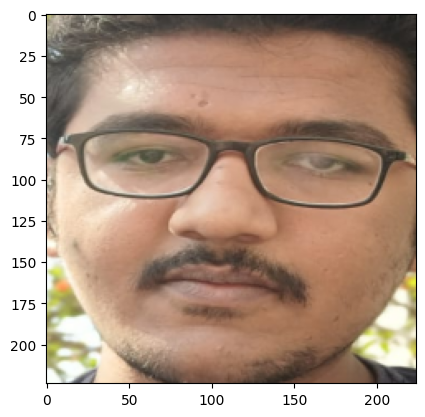

In [9]:
imgplot = plt.imshow(resized_face)
plt.show()

In [10]:
prob_model = keras.Sequential ([
custom_vgg_model,
tf.keras.layers.Softmax ()
])

In [11]:
predictions = prob_model.predict(resized_face[None, ...])

1/1 [==============================] - 3s 3s/step


In [12]:
predictions

array([[4.9186554e-03, 9.9508131e-01, 2.0204514e-08]], dtype=float32)

In [13]:
# name = keras_vggface.utils.decode_predictions(predictions)
# assume the output is stored in the variable `output`
predicted_class_index = np.argmax(predictions)
if predicted_class_index == 0:
    predicted_class_label = "bakul"
elif predicted_class_index == 1:
    predicted_class_label = "maurya"
else:
    predicted_class_label = "unknown"

print("The model predicts that the input corresponds to:", predicted_class_label)

The model predicts that the input corresponds to: maurya


In [14]:
class_names = ['bakul', 'maurya', 'unknown'] # define the class names in the same order as used during training

# assume `predictions` is a numpy array containing the predicted class indices
predicted_class_indices = np.argmax(predictions, axis=1)

# create a dictionary mapping the integer class indices to their string labels
class_index_to_label = {i: class_names[i] for i in range(len(class_names))}

# map the predicted class indices to their string labels
predicted_labels = [class_index_to_label[i] for i in predicted_class_indices]


In [15]:
predicted_labels[0]

'maurya'

In [16]:
len(face_roi)

1